In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import pylab

In [ ]:
raw_csv_data = pd.read_csv("C:/Users/MUHAMMED SHAH/Desktop/Observability server data/SET 2/SERVER 1/new_csv_formatted.csv")

In [ ]:
data = raw_csv_data.copy()

In [ ]:
data.head()

,Sr No,timestamp,vmMemoryDemand,guest_demand,guest_provisioned,vm_capacity_provisioned,effective_limit
0,0,11-11-2022 19:16,13844401.0,3838625.00,33554432,16799.99805,33815464
1,1,11-11-2022 19:21,13832758.0,3617164.25,33554432,16799.99805,33815464
2,2,11-11-2022 19:26,13834057.0,3051213.50,33554432,16799.99805,33815464
3,3,11-11-2022 19:31,13859266.0,3764804.50,33554432,16799.99805,33815464
4,4,11-11-2022 19:36,13867352.0,3174246.25,33554432,16799.99805,33815464


In [ ]:
data.tail()

,Sr No,timestamp,vmMemoryDemand,guest_demand,guest_provisioned,vm_capacity_provisioned,effective_limit
49928,49928,05-10-2023 18:51,15023986.0,5684120.00,33554432,16799.99609,33815236
49929,49929,05-10-2023 18:56,15002012.0,4872101.50,33554432,16799.99609,33815236
49930,49930,05-10-2023 19:01,14994134.0,4724462.00,33554432,16799.99609,33815236
49931,49931,05-10-2023 19:06,14986520.0,3764803.75,33554432,16799.99609,33815236
49932,49932,05-10-2023 19:11,14977126.0,4503002.00,33554432,16799.99609,33815236


In [ ]:
data.isna().sum()

Sr No                      0
timestamp                  0
vmMemoryDemand             0
guest_demand               0
guest_provisioned          0
vm_capacity_provisioned    0
effective_limit            0
dtype: int64

In [ ]:
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats.distributions import chi2
from math import sqrt

import seaborn as sns
sns.set()

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#LLR Test

# def LLR_test(mod_1, mod_2, DF=1):
#     L1 = mod_1.fit(start_ar_lags=20).llf
#     L2 = mod_2.fit(start_ar_lags=20).llf
#     LR = (2*(L2-L1))
#     p = chi2.sf(LR,DF).round(3)
#     return p

In [ ]:
# df['returns'] = df.market_value.pct_change(1)*100

In [ ]:
#LLR_test

def LLR_test(mod_1, mod_2, DF=1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR,DF).round(3)
    return p

In [ ]:
data['returns'] = data.vmMemoryDemand.pct_change(1)*100

In [ ]:
#ARIMA(1,1,1)

model_ar_1_i_1_ma_1 = ARIMA(data.vmMemoryDemand, order=(1,1,1))
results_ar_1_i_1_ma_1 = model_ar_1_i_1_ma_1.fit()
results_ar_1_i_1_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:         vmMemoryDemand   No. Observations:                49933
Model:                 ARIMA(1, 1, 1)   Log Likelihood             -758491.254
Date:                Thu, 01 Jun 2023   AIC                        1516988.507
Time:                        10:23:58   BIC                        1517014.962
Sample:                             0   HQIC                       1516996.795
                              - 49933                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4546      0.001    418.940      0.000       0.452       0.457
ma.L1         -0.8894      0.001  -1199.468      0.000      -0.891      -0.888
sigma2      9.807e+11   5.32e-17   1.84e+28      0.000    9.81e+11    9.81e+11
===================================================================================
Ljung-Box (L1) (Q):                   1.73   Jarque-Bera (JB):          75879681.65
Prob(Q):                              0.19   Prob(JB):                         0.00
Heteroskedasticity (H):               0.02   Skew:                            -4.71
Prob(H) (two-sided):                  0.00   Kurtosis:                       193.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.58e+42. Standard errors may be unstable.
"""

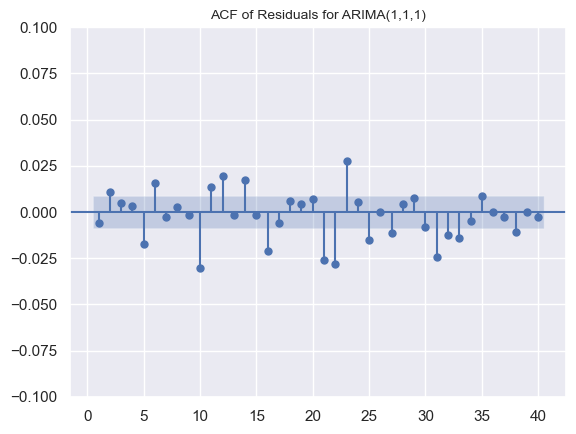

In [ ]:
#Residuals of ARIMA(1,1,1)

data['res_ar_1_i_1_ma_1'] = results_ar_1_i_1_ma_1.resid
sgt.plot_acf(data.res_ar_1_i_1_ma_1[1:], zero = False, lags = 40)
plt.title("ACF of Residuals for ARIMA(1,1,1)", size=10)
plt.ylim(-0.10,0.10)
plt.show()

In [ ]:
#ARIMA(1,1,2)

model_ar_1_i_1_ma_2 = ARIMA(data.vmMemoryDemand, order=(1,1,2))
results_ar_1_i_1_ma_2 = model_ar_1_i_1_ma_2.fit()
results_ar_1_i_1_ma_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:         vmMemoryDemand   No. Observations:                49933
Model:                 ARIMA(1, 1, 2)   Log Likelihood             -758442.903
Date:                Thu, 01 Jun 2023   AIC                        1516893.806
Time:                        13:46:37   BIC                        1516929.080
Sample:                             0   HQIC                       1516904.856
                              - 49933                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4891      0.002    196.020      0.000       0.484       0.494
ma.L1         -0.9295      0.003   -353.405      0.000      -0.935      -0.924
ma.L2          0.0313      0.002     16.970      0.000       0.028       0.035
sigma2      9.489e+11   1.18e-15   8.03e+26      0.000    9.49e+11    9.49e+11
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):          75803860.01
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.02   Skew:                            -4.70
Prob(H) (two-sided):                  0.00   Kurtosis:                       193.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.32e+41. Standard errors may be unstable.
"""

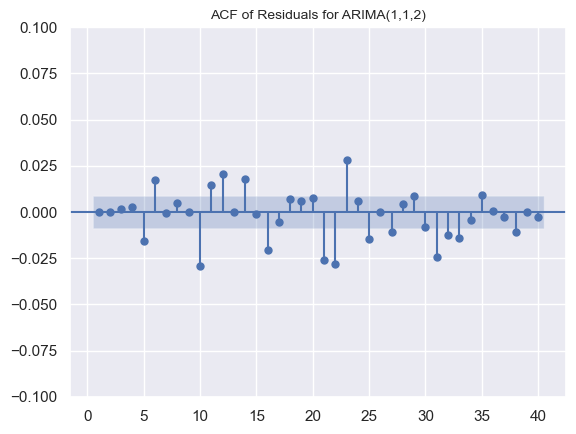

In [ ]:
#Residuals of ARIMA(1,1,2)

data['res_ar_1_i_1_ma_2'] = results_ar_1_i_1_ma_2.resid
sgt.plot_acf(data.res_ar_1_i_1_ma_2[1:], zero = False, lags = 40)
plt.title("ACF of Residuals for ARIMA(1,1,2)", size=10)
plt.ylim(-0.10,0.10)
plt.show()

In [ ]:
#ARIMA(1,1,3)

model_ar_1_i_1_ma_3 = ARIMA(data.vmMemoryDemand, order=(1,1,3))
results_ar_1_i_1_ma_3 = model_ar_1_i_1_ma_3.fit()
results_ar_1_i_1_ma_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:         vmMemoryDemand   No. Observations:                49933
Model:                 ARIMA(1, 1, 3)   Log Likelihood             -758431.151
Date:                Thu, 01 Jun 2023   AIC                        1516872.302
Time:                        13:47:52   BIC                        1516916.394
Sample:                             0   HQIC                       1516886.114
                              - 49933                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4917      0.005     92.114      0.000       0.481       0.502
ma.L1         -0.9321      0.005   -173.176      0.000      -0.943      -0.922
ma.L2          0.0322      0.002     13.089      0.000       0.027       0.037
ma.L3          0.0012      0.002      0.582      0.561      -0.003       0.005
sigma2       9.34e+11   1.23e-15   7.62e+26      0.000    9.34e+11    9.34e+11
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):          75802585.49
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.02   Skew:                            -4.70
Prob(H) (two-sided):                  0.00   Kurtosis:                       193.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.25e+42. Standard errors may be unstable.
"""

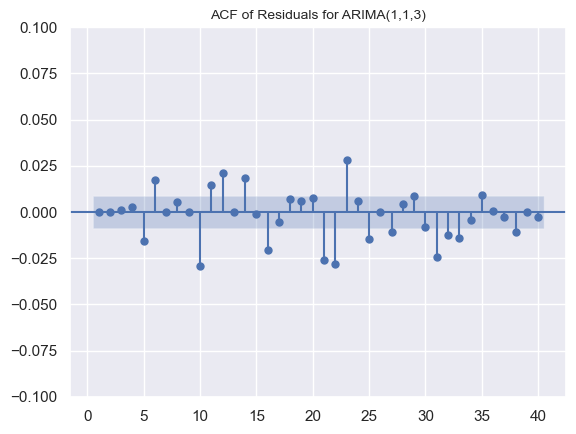

In [ ]:
#Residuals of ARIMA(1,1,3)

data['res_ar_1_i_1_ma_3'] = results_ar_1_i_1_ma_3.resid
sgt.plot_acf(data.res_ar_1_i_1_ma_3[1:], zero = False, lags = 40)
plt.title("ACF of Residuals for ARIMA(1,1,3)", size=10)
plt.ylim(-0.10,0.10)
plt.show()

In [ ]:
#ARIMA(2,1,1)

model_ar_2_i_1_ma_1 = ARIMA(data.vmMemoryDemand, order=(2,1,1))
results_ar_2_i_1_ma_1 = model_ar_2_i_1_ma_1.fit()
results_ar_2_i_1_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:         vmMemoryDemand   No. Observations:                49933
Model:                 ARIMA(2, 1, 1)   Log Likelihood             -758486.541
Date:                Thu, 01 Jun 2023   AIC                        1516981.082
Time:                        13:49:38   BIC                        1517016.356
Sample:                             0   HQIC                       1516992.132
                              - 49933                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4539      0.001    410.276      0.000       0.452       0.456
ar.L2          0.0160      0.001     16.254      0.000       0.014       0.018
ma.L1         -0.8942      0.001  -1009.031      0.000      -0.896      -0.892
sigma2      9.806e+11   1.34e-16   7.33e+27      0.000    9.81e+11    9.81e+11
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):          75805745.09
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.02   Skew:                            -4.70
Prob(H) (two-sided):                  0.00   Kurtosis:                       193.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.5e+42. Standard errors may be unstable.
"""

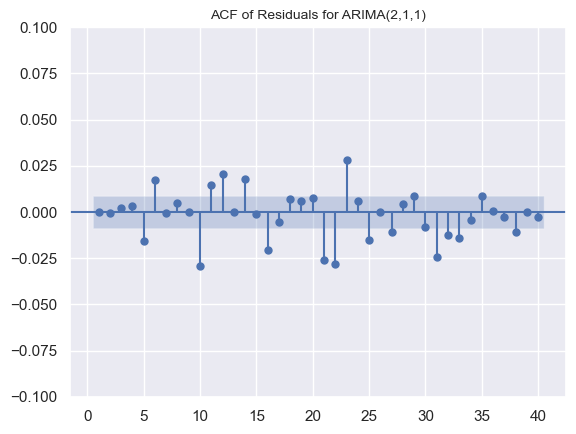

In [ ]:
#Residuals of ARIMA(2,1,1)

data['res_ar_2_i_1_ma_1'] = results_ar_2_i_1_ma_1.resid
sgt.plot_acf(data.res_ar_2_i_1_ma_1[1:], zero = False, lags = 40)
plt.title("ACF of Residuals for ARIMA(2,1,1)", size=10)
plt.ylim(-0.10,0.10)
plt.show()

In [ ]:
#ARIMA(2,1,2)

model_ar_2_i_1_ma_2 = ARIMA(data.vmMemoryDemand, order=(2,1,2))
results_ar_2_i_1_ma_2 = model_ar_2_i_1_ma_2.fit()
results_ar_2_i_1_ma_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:         vmMemoryDemand   No. Observations:                49933
Model:                 ARIMA(2, 1, 2)   Log Likelihood             -758435.784
Date:                Thu, 01 Jun 2023   AIC                        1516881.569
Time:                        13:51:27   BIC                        1516925.661
Sample:                             0   HQIC                       1516895.381
                              - 49933                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3696      0.024    -15.656      0.000      -0.416      -0.323
ar.L2          0.3842      0.010     37.702      0.000       0.364       0.404
ma.L1         -0.0684      0.024     -2.888      0.004      -0.115      -0.022
ma.L2         -0.7327      0.021    -35.289      0.000      -0.773      -0.692
sigma2      9.417e+11   3.86e-15   2.44e+26      0.000    9.42e+11    9.42e+11
===================================================================================
Ljung-Box (L1) (Q):                   0.31   Jarque-Bera (JB):          75842643.55
Prob(Q):                              0.58   Prob(JB):                         0.00
Heteroskedasticity (H):               0.02   Skew:                            -4.70
Prob(H) (two-sided):                  0.00   Kurtosis:                       193.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.67e+41. Standard errors may be unstable.
"""

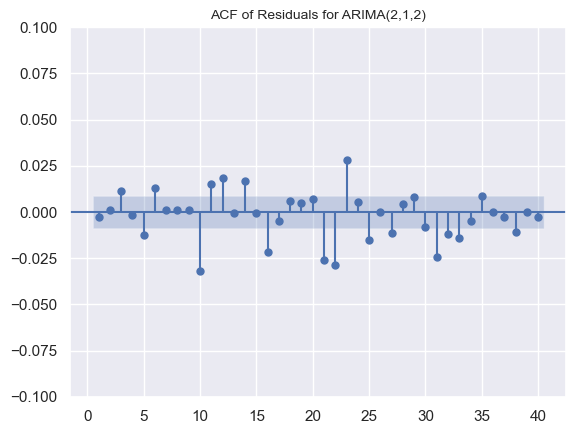

In [ ]:
#Residuals of ARIMA(2,1,2)

data['res_ar_2_i_1_ma_2'] = results_ar_2_i_1_ma_2.resid
sgt.plot_acf(data.res_ar_2_i_1_ma_2[1:], zero = False, lags = 40)
plt.title("ACF of Residuals for ARIMA(2,1,2)", size=10)
plt.ylim(-0.10,0.10)
plt.show()

In [ ]:
#ARIMA(2,1,3)

model_ar_2_i_1_ma_3 = ARIMA(data.vmMemoryDemand, order=(2,1,3))
results_ar_2_i_1_ma_3 = model_ar_2_i_1_ma_3.fit()
results_ar_2_i_1_ma_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:         vmMemoryDemand   No. Observations:                49933
Model:                 ARIMA(2, 1, 3)   Log Likelihood             -758427.862
Date:                Thu, 01 Jun 2023   AIC                        1516867.724
Time:                        13:51:46   BIC                        1516920.635
Sample:                             0   HQIC                       1516884.299
                              - 49933                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3736      0.035    -10.538      0.000      -0.443      -0.304
ar.L2          0.4107      0.018     22.257      0.000       0.375       0.447
ma.L1         -0.0667      0.035     -1.881      0.060      -0.136       0.003
ma.L2         -0.7573      0.034    -22.244      0.000      -0.824      -0.691
ma.L3          0.0166      0.003      5.957      0.000       0.011       0.022
sigma2      9.314e+11   1.54e-13   6.03e+24      0.000    9.31e+11    9.31e+11
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):          75808721.87
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.02   Skew:                            -4.69
Prob(H) (two-sided):                  0.00   Kurtosis:                       193.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.29e+39. Standard errors may be unstable.
"""

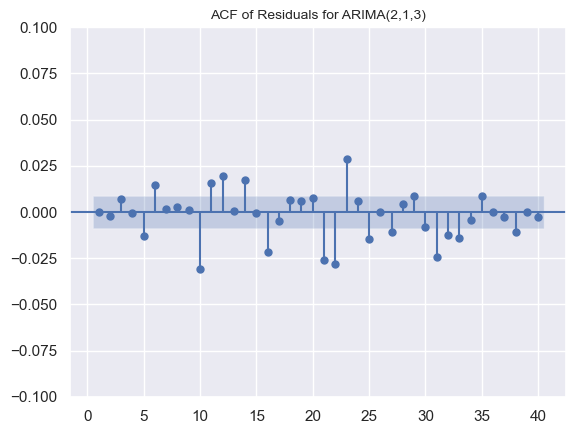

In [ ]:
#Residuals of ARIMA(2,1,3)

data['res_ar_2_i_1_ma_3'] = results_ar_2_i_1_ma_3.resid
sgt.plot_acf(data.res_ar_2_i_1_ma_3[1:], zero = False, lags = 40)
plt.title("ACF of Residuals for ARIMA(2,1,3)", size=10)
plt.ylim(-0.10,0.10)
plt.show()

In [ ]:
#ARIMA(3,1,1)

model_ar_3_i_1_ma_1 = ARIMA(data.vmMemoryDemand, order=(3,1,1))
results_ar_3_i_1_ma_1 = model_ar_3_i_1_ma_1.fit()
results_ar_3_i_1_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:         vmMemoryDemand   No. Observations:                49933
Model:                 ARIMA(3, 1, 1)   Log Likelihood             -758486.506
Date:                Thu, 01 Jun 2023   AIC                        1516983.013
Time:                        13:56:53   BIC                        1517027.105
Sample:                             0   HQIC                       1516996.825
                              - 49933                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4543      0.001    383.691      0.000       0.452       0.457
ar.L2          0.0157      0.001     15.587      0.000       0.014       0.018
ar.L3          0.0014      0.001      1.222      0.222      -0.001       0.004
ma.L1         -0.8947      0.001   -915.174      0.000      -0.897      -0.893
sigma2      9.806e+11   1.32e-16   7.44e+27      0.000    9.81e+11    9.81e+11
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):          75805443.39
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.02   Skew:                            -4.70
Prob(H) (two-sided):                  0.00   Kurtosis:                       193.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.87e+42. Standard errors may be unstable.
"""

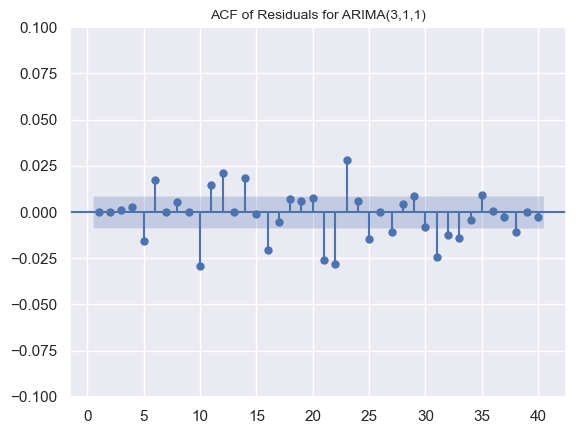

In [ ]:
#Residuals of ARIMA(3,1,1)

data['res_ar_3_i_1_ma_1'] = results_ar_3_i_1_ma_1.resid
sgt.plot_acf(data.res_ar_3_i_1_ma_1[1:], zero = False, lags = 40)
plt.title("ACF of Residuals for ARIMA(3,1,1)", size=10)
plt.ylim(-0.10,0.10)
plt.show()

In [ ]:
#ARIMA(3,1,2)

model_ar_3_i_1_ma_2 = ARIMA(data.vmMemoryDemand, order=(3,1,2))
results_ar_3_i_1_ma_2 = model_ar_3_i_1_ma_2.fit()
results_ar_3_i_1_ma_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:         vmMemoryDemand   No. Observations:                49933
Model:                 ARIMA(3, 1, 2)   Log Likelihood             -758434.575
Date:                Thu, 01 Jun 2023   AIC                        1516881.150
Time:                        13:57:10   BIC                        1516934.060
Sample:                             0   HQIC                       1516897.725
                              - 49933                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3419      0.049     -7.023      0.000      -0.437      -0.246
ar.L2          0.3775      0.022     17.065      0.000       0.334       0.421
ar.L3          0.0068      0.002      4.231      0.000       0.004       0.010
ma.L1         -0.0983      0.049     -2.020      0.043      -0.194      -0.003
ma.L2         -0.7100      0.044    -16.267      0.000      -0.796      -0.624
sigma2      9.414e+11   3.35e-13   2.81e+24      0.000    9.41e+11    9.41e+11
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):          75817181.00
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               0.02   Skew:                            -4.69
Prob(H) (two-sided):                  0.00   Kurtosis:                       193.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.22e+38. Standard errors may be unstable.
"""

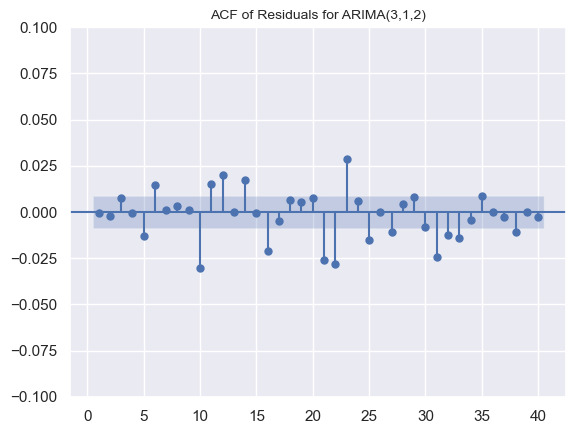

In [ ]:
#Residuals of ARIMA(3,1,2)

data['res_ar_3_i_1_ma_2'] = results_ar_3_i_1_ma_2.resid
sgt.plot_acf(data.res_ar_3_i_1_ma_2[1:], zero = False, lags = 40)
plt.title("ACF of Residuals for ARIMA(3,1,2)", size=10)
plt.ylim(-0.10,0.10)
plt.show()

In [ ]:
#ARIMA(3,1,3)

model_ar_3_i_1_ma_3 = ARIMA(data.vmMemoryDemand, order=(3,1,3))
results_ar_3_i_1_ma_3 = model_ar_3_i_1_ma_3.fit()
results_ar_3_i_1_ma_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:         vmMemoryDemand   No. Observations:                49933
Model:                 ARIMA(3, 1, 3)   Log Likelihood             -758404.606
Date:                Thu, 01 Jun 2023   AIC                        1516823.211
Time:                        13:58:00   BIC                        1516884.940
Sample:                             0   HQIC                       1516842.549
                              - 49933                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7588      0.006   -131.676      0.000      -0.770      -0.748
ar.L2         -0.4039      0.004    -98.195      0.000      -0.412      -0.396
ar.L3          0.4367      0.003    158.840      0.000       0.431       0.442
ma.L1          0.3277      0.006     56.417      0.000       0.316       0.339
ma.L2         -0.1314      0.004    -30.196      0.000      -0.140      -0.123
ma.L3         -0.8470      0.005   -165.674      0.000      -0.857      -0.837
sigma2      9.289e+11   1.62e-14   5.72e+25      0.000    9.29e+11    9.29e+11
===================================================================================
Ljung-Box (L1) (Q):                   3.88   Jarque-Bera (JB):          75321835.02
Prob(Q):                              0.05   Prob(JB):                         0.00
Heteroskedasticity (H):               0.02   Skew:                            -4.73
Prob(H) (two-sided):                  0.00   Kurtosis:                       193.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 9.54e+39. Standard errors may be unstable.
"""

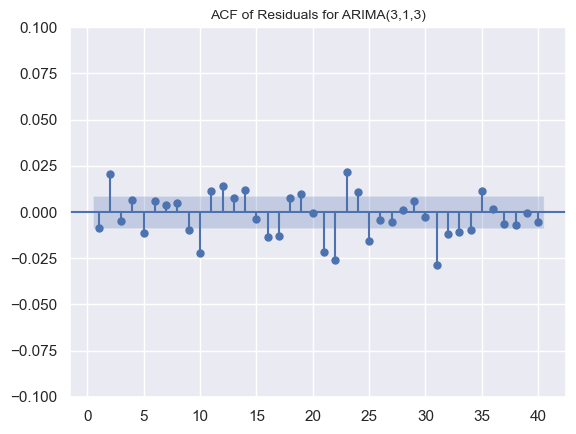

In [ ]:
#Residuals of ARIMA(3,1,3)

data['res_ar_3_i_1_ma_3'] = results_ar_3_i_1_ma_3.resid
sgt.plot_acf(data.res_ar_3_i_1_ma_3[1:], zero = False, lags = 40)
plt.title("ACF of Residuals for ARIMA(3,1,3)", size=10)
plt.ylim(-0.10,0.10)
plt.show()

In [ ]:
#ARIMA(3,2,3)

model_ar_3_i_2_ma_3 = ARIMA(data.vmMemoryDemand, order=(3,2,3))
results_ar_3_i_2_ma_3 = model_ar_3_i_2_ma_3.fit()
results_ar_3_i_2_ma_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:         vmMemoryDemand   No. Observations:                49933
Model:                 ARIMA(3, 2, 3)   Log Likelihood             -759022.810
Date:                Thu, 01 Jun 2023   AIC                        1518059.621
Time:                        14:00:52   BIC                        1518121.350
Sample:                             0   HQIC                       1518078.958
                              - 49933                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5444      0.001   -419.564      0.000      -0.547      -0.542
ar.L2          0.4690      0.002    246.910      0.000       0.465       0.473
ar.L3          0.0137      0.001     12.000      0.000       0.011       0.016
ma.L1         -0.8934      0.001   -707.858      0.000      -0.896      -0.891
ma.L2         -0.9999      0.000  -3271.765      0.000      -1.000      -0.999
ma.L3          0.8933      0.001    736.505      0.000       0.891       0.896
sigma2      1.136e+12   2.01e-15   5.65e+26      0.000    1.14e+12    1.14e+12
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):          75165216.85
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               0.02   Skew:                            -4.67
Prob(H) (two-sided):                  0.00   Kurtosis:                       192.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.1e+40. Standard errors may be unstable.
"""

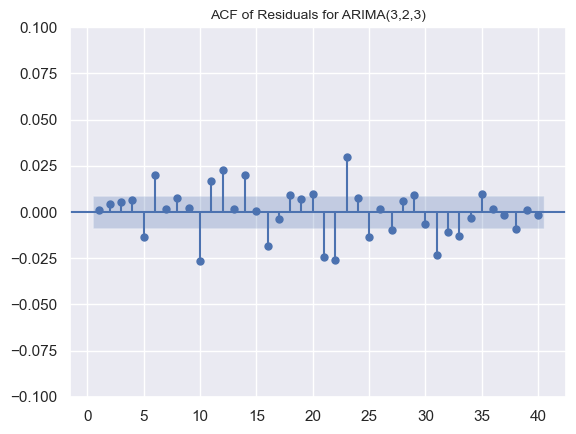

In [ ]:
#Residuals of ARIMA(3,2,3)

data['res_ar_3_i_2_ma_3'] = results_ar_3_i_2_ma_3.resid
sgt.plot_acf(data.res_ar_3_i_2_ma_3[1:], zero = False, lags = 40)
plt.title("ACF of Residuals for ARIMA(3,2,3)", size=10)
plt.ylim(-0.10,0.10)
plt.show()

In [ ]:
#ARIMA(3,3,3)

model_ar_3_i_3_ma_3 = ARIMA(data.vmMemoryDemand, order=(3,3,3))
results_ar_3_i_3_ma_3 = model_ar_3_i_3_ma_3.fit()
results_ar_3_i_3_ma_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:         vmMemoryDemand   No. Observations:                49933
Model:                 ARIMA(3, 3, 3)   Log Likelihood             -763455.068
Date:                Thu, 01 Jun 2023   AIC                        1526924.136
Time:                        14:01:52   BIC                        1526985.865
Sample:                             0   HQIC                       1526943.474
                              - 49933                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3188      0.001  -1302.740      0.000      -1.321      -1.317
ar.L2         -0.5319      0.002   -313.422      0.000      -0.535      -0.529
ar.L3         -0.2131      0.001   -173.260      0.000      -0.216      -0.211
ma.L1         -0.9997      0.001  -1844.895      0.000      -1.001      -0.999
ma.L2         -1.0000      0.001   -994.121      0.000      -1.002      -0.998
ma.L3          0.9997      0.001   1956.025      0.000       0.999       1.001
sigma2      1.647e+12    7.3e-16   2.26e+27      0.000    1.65e+12    1.65e+12
===================================================================================
Ljung-Box (L1) (Q):                  79.08   Jarque-Bera (JB):          81302639.16
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.02   Skew:                            -2.26
Prob(H) (two-sided):                  0.00   Kurtosis:                       200.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.88e+40. Standard errors may be unstable.
"""

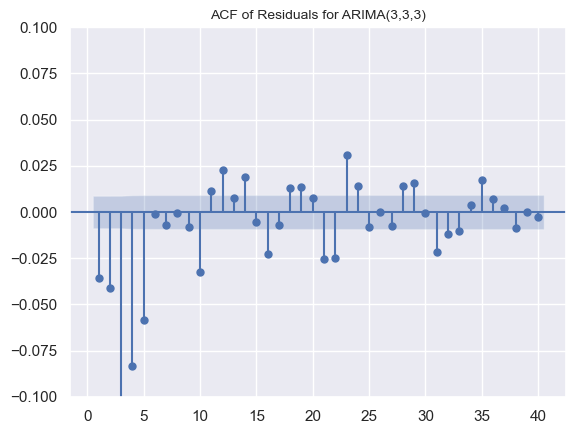

In [ ]:
#Residuals of ARIMA(3,3,3)

data['res_ar_3_i_3_ma_3'] = results_ar_3_i_3_ma_3.resid
sgt.plot_acf(data.res_ar_3_i_3_ma_3[1:], zero = False, lags = 40)
plt.title("ACF of Residuals for ARIMA(3,3,3)", size=10)
plt.ylim(-0.10,0.10)
plt.show()

In [ ]:
#Higher Lag ARIMA Models

In [ ]:
model_ar_1_i_1_ma_1 = ARIMA(data.vmMemoryDemand, order=(1,1,1))
results_ar_1_i_1_ma_1 = model_ar_1_i_1_ma_1.fit()
model_ar_1_i_1_ma_2 = ARIMA(data.vmMemoryDemand, order=(1,1,2))
results_ar_1_i_1_ma_2 = model_ar_1_i_1_ma_2.fit()
model_ar_1_i_1_ma_3 = ARIMA(data.vmMemoryDemand, order=(1,1,3))
results_ar_1_i_1_ma_3 = model_ar_1_i_1_ma_3.fit()
model_ar_2_i_1_ma_1 = ARIMA(data.vmMemoryDemand, order=(2,1,1))
results_ar_2_i_1_ma_1 = model_ar_2_i_1_ma_1.fit()
model_ar_2_i_1_ma_2 = ARIMA(data.vmMemoryDemand, order=(2,1,2))
results_ar_2_i_1_ma_2 = model_ar_2_i_1_ma_2.fit()
model_ar_2_i_1_ma_3 = ARIMA(data.vmMemoryDemand, order=(2,1,3))
results_ar_2_i_1_ma_3 = model_ar_2_i_1_ma_3.fit()

model_ar_2_i_2_ma_3 = ARIMA(data.vmMemoryDemand, order=(2,2,3))
results_ar_2_i_2_ma_3 = model_ar_2_i_2_ma_3.fit()
model_ar_2_i_3_ma_3 = ARIMA(data.vmMemoryDemand, order=(2,3,3))
results_ar_2_i_3_ma_3 = model_ar_2_i_3_ma_3.fit()

model_ar_3_i_1_ma_1 = ARIMA(data.vmMemoryDemand, order=(3,1,1))
results_ar_3_i_1_ma_1 = model_ar_3_i_1_ma_1.fit()
model_ar_3_i_1_ma_2 = ARIMA(data.vmMemoryDemand, order=(3,1,2))
results_ar_3_i_1_ma_2 = model_ar_3_i_1_ma_2.fit()
model_ar_3_i_1_ma_3 = ARIMA(data.vmMemoryDemand, order=(3,1,3))
results_ar_3_i_1_ma_3 = model_ar_3_i_1_ma_3.fit()
model_ar_3_i_2_ma_3 = ARIMA(data.vmMemoryDemand, order=(3,2,3))
results_ar_3_i_2_ma_3 = model_ar_3_i_2_ma_3.fit()
model_ar_3_i_3_ma_3 = ARIMA(data.vmMemoryDemand, order=(3,3,3))
results_ar_3_i_3_ma_3 = model_ar_3_i_3_ma_3.fit()

In [ ]:
print("ARIMA(1,1,1): \t LL= ", results_ar_1_i_1_ma_1.llf, "\t AIC= ", results_ar_1_i_1_ma_1.aic)
print("ARIMA(1,1,2): \t LL= ", results_ar_1_i_1_ma_2.llf, "\t AIC= ", results_ar_1_i_1_ma_2.aic)
print("ARIMA(1,1,3): \t LL= ", results_ar_1_i_1_ma_3.llf, "\t AIC= ", results_ar_1_i_1_ma_3.aic)
print("ARIMA(2,1,1): \t LL= ", results_ar_2_i_1_ma_1.llf, "\t AIC= ", results_ar_2_i_1_ma_1.aic)
print("ARIMA(2,1,2): \t LL= ", results_ar_2_i_1_ma_2.llf, "\t AIC= ", results_ar_2_i_1_ma_2.aic)
print("ARIMA(2,1,3): \t LL= ", results_ar_2_i_1_ma_3.llf, "\t AIC= ", results_ar_2_i_1_ma_3.aic)

print("ARIMA(2,2,3): \t LL= ", results_ar_2_i_2_ma_3.llf, "\t AIC= ", results_ar_2_i_2_ma_3.aic)
print("ARIMA(2,3,3): \t LL= ", results_ar_2_i_3_ma_3.llf, "\t AIC= ", results_ar_2_i_3_ma_3.aic)

print("ARIMA(3,1,1): \t LL= ", results_ar_3_i_1_ma_1.llf, "\t AIC= ", results_ar_3_i_1_ma_1.aic)
print("ARIMA(3,1,2): \t LL= ", results_ar_3_i_1_ma_2.llf, "\t AIC= ", results_ar_3_i_1_ma_2.aic)
print("ARIMA(3,1,3): \t LL= ", results_ar_3_i_1_ma_3.llf, "\t AIC= ", results_ar_3_i_1_ma_3.aic)
print("ARIMA(3,2,3): \t LL= ", results_ar_3_i_2_ma_3.llf, "\t AIC= ", results_ar_3_i_2_ma_3.aic)
print("ARIMA(3,3,3); \t LL= ", results_ar_3_i_3_ma_3.llf, "\t AIC= ", results_ar_3_i_3_ma_3.aic)

ARIMA(1,1,1): 	 LL=  -758491.2535580555 	 AIC=  1516988.507116111
ARIMA(1,1,2): 	 LL=  -758442.9031603339 	 AIC=  1516893.8063206677
ARIMA(1,1,3): 	 LL=  -758431.1507708147 	 AIC=  1516872.3015416295
ARIMA(2,1,1): 	 LL=  -758486.5411102443 	 AIC=  1516981.0822204887
ARIMA(2,1,2): 	 LL=  -758435.784318084 	 AIC=  1516881.568636168
ARIMA(2,1,3): 	 LL=  -758427.8620546549 	 AIC=  1516867.7241093097
ARIMA(2,2,3): 	 LL=  -759082.8554216945 	 AIC=  1518177.710843389
ARIMA(2,3,3): 	 LL=  -764832.8722201803 	 AIC=  1529677.7444403607
ARIMA(3,1,1): 	 LL=  -758486.5064628238 	 AIC=  1516983.0129256477
ARIMA(3,1,2): 	 LL=  -758434.574931762 	 AIC=  1516881.149863524
ARIMA(3,1,3): 	 LL=  -758404.6055587888 	 AIC=  1516823.2111175775
ARIMA(3,2,3): 	 LL=  -759022.8104980162 	 AIC=  1518059.6209960324
ARIMA(3,3,3); 	 LL=  -763455.0681753771 	 AIC=  1526924.1363507542


In [ ]:
print("\n LLR test p-value= "+str(LLR_test(model_ar_2_i_1_ma_3, model_ar_3_i_1_ma_3)))


 LLR test p-value= 0.0


In [ ]:
print("\n LLR test p-value= "+str(LLR_test(model_ar_2_i_3_ma_3, model_ar_3_i_1_ma_3)))


 LLR test p-value= 0.0


In [ ]:
print("\n LLR test p-value= "+str(LLR_test(model_ar_3_i_1_ma_3, model_ar_3_i_2_ma_3)))


 LLR test p-value= 1.0


In [ ]:
#STEP 1 of 2: Checking if Integrated dataset is stationary

In [ ]:
data['memory'] = data.vmMemoryDemand.diff(1)

In [ ]:
model_delta_ar_1_i_1_ma_1 = ARIMA(data.vmMemoryDemand[1:], order=(1,0,1))
results_delta_ar_1_i_1_ma_1 = model_delta_ar_1_i_1_ma_1.fit()
results_delta_ar_1_i_1_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:         vmMemoryDemand   No. Observations:                49932
Model:                 ARIMA(1, 0, 1)   Log Likelihood             -760259.849
Date:                Thu, 01 Jun 2023   AIC                        1520527.699
Time:                        16:15:13   BIC                        1520562.972
Sample:                             0   HQIC                       1520538.749
                              - 49932                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.464e+07   4.67e-13   3.13e+19      0.000    1.46e+07    1.46e+07
ar.L1          0.9877      0.000   2209.444      0.000       0.987       0.989
ma.L1         -0.4844      0.001   -669.720      0.000      -0.486      -0.483
sigma2      1.008e+12   1.53e-16    6.6e+27      0.000    1.01e+12    1.01e+12
===================================================================================
Ljung-Box (L1) (Q):                 492.36   Jarque-Bera (JB):          70242550.00
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.02   Skew:                            -3.27
Prob(H) (two-sided):                  0.00   Kurtosis:                       186.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.45e+41. Standard errors may be unstable.
"""

In [ ]:
#Step 2 of 2: Dickey-Fuller Test

sts.adfuller(data.vmMemoryDemand[1:])

(-6.548532287798404,
 8.971659450976896e-09,
 56,
 49875,
 {'1%': -3.4304811205331993,
  '5%': -2.861597952579616,
  '10%': -2.566800846242021},
 1514745.7793265956)